In [1]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('creditcard.csv')

## Data Exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Amount'], axis = 1)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
data = data.drop(['Time'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
x = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [8]:
x.shape

(284807, 29)

In [9]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [11]:
X_train.shape

(199364, 29)

In [12]:
X_test.shape

(85443, 29)

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

## Deep Neural Network

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
model = Sequential()
model.add(Dense(units = 16, input_dim = 29, activation = 'relu'))
model.add(Dense(units = 24, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 20, activation = 'relu'))
model.add(Dense(units = 24, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

## Training The Model

In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
199364/199364 [==============================] - 44s 219us/step - loss: 0.0096 - accuracy: 0.9979
Epoch 2/5
199364/199364 [==============================] - 50s 252us/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 50s 252us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
199364/199364 [==============================] - 48s 240us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 49s 246us/step - loss: 0.0031 - accuracy: 0.9994


In [19]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 3s 39us/step


In [20]:
print(score)

[0.0038584531394969595, 0.9993914365768433]


In [23]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85275    21]
 [   31   116]]


<function matplotlib.pyplot.show(close=None, block=None)>

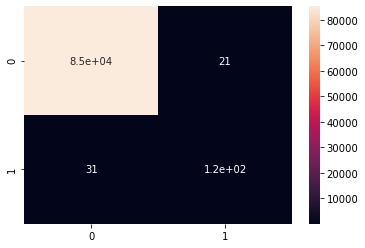

In [26]:
import seaborn as sns
sns.heatmap(cm, annot = True)

## Undersampling

In [27]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [28]:
normal_indices = data[data.Class == 0].index

In [29]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [30]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [31]:
under_sample_data = data.iloc[under_sample_indices,:]

In [32]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [34]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
688/688 [==============================] - 1s 1ms/step - loss: 0.4619 - accuracy: 0.9026
Epoch 2/5
688/688 [==============================] - 0s 206us/step - loss: 0.2049 - accuracy: 0.9172
Epoch 3/5
688/688 [==============================] - 0s 195us/step - loss: 0.1820 - accuracy: 0.9273
Epoch 4/5
688/688 [==============================] - 0s 197us/step - loss: 0.1434 - accuracy: 0.9360
Epoch 5/5
688/688 [==============================] - 0s 206us/step - loss: 0.1368 - accuracy: 0.9375


<AxesSubplot:>

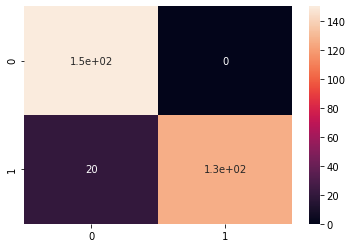

In [37]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(cnf_matrix, annot = True)

<AxesSubplot:>

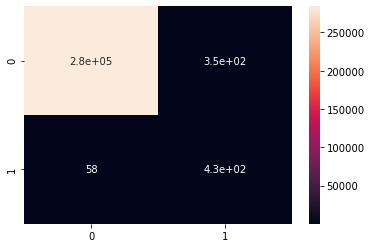

In [39]:
y_pred = model.predict(x)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(cnf_matrix, annot = True)

## Smote

In [41]:
from imblearn.over_sampling import SMOTE

In [43]:
X_resample, y_resample = SMOTE().fit_sample(x,y.values.ravel())

In [44]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [46]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 83s 208us/step - loss: 0.0331 - accuracy: 0.9889
Epoch 2/5
398041/398041 [==============================] - 84s 211us/step - loss: 0.0138 - accuracy: 0.9966
Epoch 3/5
398041/398041 [==============================] - 101s 254us/step - loss: 0.0110 - accuracy: 0.9973
Epoch 4/5
398041/398041 [==============================] - 104s 261us/step - loss: 0.0091 - accuracy: 0.9978
Epoch 5/5
398041/398041 [==============================] - 32s 81us/step - loss: 0.0084 - accuracy: 0.9980


<AxesSubplot:>

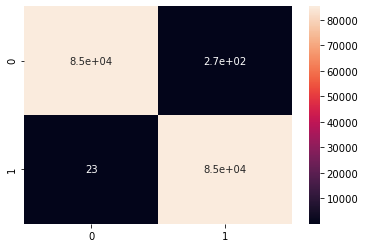

In [48]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(cnf_matrix, annot = True)

<AxesSubplot:>

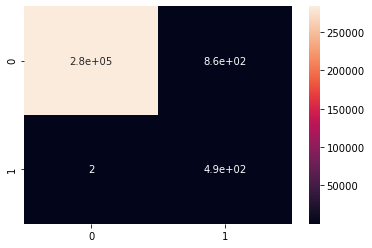

In [49]:
y_pred = model.predict(x)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(cnf_matrix, annot = True)